## Lambda Layer

This lab will show how you can define custom layers with the [Lambda](https://keras.io/api/layers/core_layers/lambda/) layer. You can either use [lambda functions](https://www.w3schools.com/python/python_lambda.asp) within the Lambda layer or define a custom function that the Lambda layer will call. Let's get started!

In [6]:
# imports

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

## Prepare the Dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


## Build the Model

Here, we'll use a Lambda layer to define a custom layer in our network. We're using a lambda function to get the absolute value of the layer input.

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(lambda x: tf.abs(x)), 
  tf.keras.layers.Dense(10, activation='softmax')
])

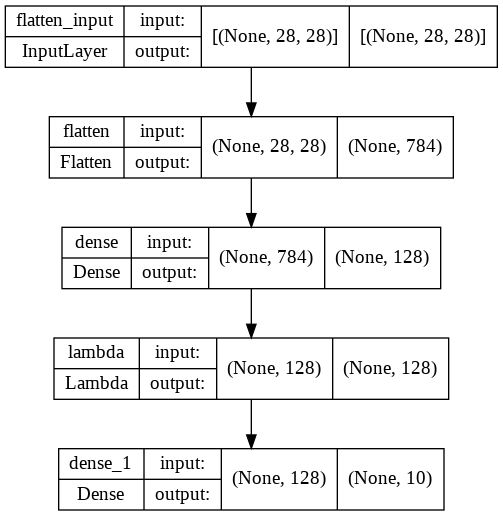

In [9]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='Model_with_lambda_layer.png')


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2266 - accuracy: 0.9358
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9736


[0.09661677479743958, 0.9735999703407288]

Another way to use the Lambda layer is to pass in a function defined outside the model. The code below shows how a custom ReLU function is used as a custom layer in the model.

In [10]:
def my_relu(x):
    return K.maximum(-0.1, x)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Lambda(my_relu), 
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2633 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1172 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9821
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9761


[0.07821565121412277, 0.9761000275611877]